# Dataset Analysis

In [5]:
import os
from glob import glob
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from dataset.utils import load_json_file, ROOT_DIR

sns.set(style="darkgrid", font_scale=1.5)

In [110]:
WEEKS = 6
AGGREGATED_FILE_PATH = os.path.join(ROOT_DIR, 'data/milan/aggregated_bs_data-LTE.csv')
CHUNKS_FOLDER = os.path.join(ROOT_DIR, 'data/milan/aggregated-chunks-lte')
N_NODES = 4

In [121]:
bs_df = pd.read_csv(AGGREGATED_FILE_PATH)
bs_df.head()


,aggregated_bs_id,type,n_base_stations,lng,lat
0,1,LTE,1,9.014969,45.361862
1,2,LTE,1,9.021286,45.358292
2,3,LTE,1,9.060212,45.361147
3,4,LTE,1,9.064404,45.364611
4,5,LTE,1,9.105606,45.370102


In [122]:
chunk_paths = sorted(glob(f'{CHUNKS_FOLDER}/*.csv'), key=lambda x: x.split('/')[-1])
print(f'Loaded {len(chunk_paths)} chunks')

Loaded 62 chunks


In [123]:
file_index = 0
dfs = []
for week in range(WEEKS):
    for day in range(7):
        df = pd.read_csv(chunk_paths[file_index])
        file_index += 1
        dfs.append(df)

In [124]:
df = pd.concat(dfs, ignore_index=True)

In [125]:
df_internet_max = df.groupby(['aggregated_bs_id'])['internet'].idxmax()
peaks_df = df.loc[df_internet_max.values]

In [126]:
peaks_df['internet'].max()

40252.50492870111

In [130]:
highest_peaks = peaks_df.sort_values(['internet'], ascending=False)[0: N_NODES]
candidate_nodes = highest_peaks['aggregated_bs_id'].to_list()
candidate_nodes

[2268, 4225, 2341, 3160]

In [131]:
filtered = df[
    (df['aggregated_bs_id'].isin(candidate_nodes))
]
filtered['aggregated_bs_id'] = filtered['aggregated_bs_id'].astype(str)
filtered

<ipython-input-131-d2c7d7d39d3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['aggregated_bs_id'] = filtered['aggregated_bs_id'].astype(str)


,hour,weekday,idx,aggregated_bs_id,internet
2267,0,4,96,2268,2125.890955
2340,0,4,96,2341,5782.382873
3159,0,4,96,3160,1704.827756
4224,0,4,96,4225,23.576130
8079,1,4,97,2268,1203.833926
...,...,...,...,...,...
5850138,22,3,94,4225,25.630628
5853993,23,3,95,2268,3159.408199
5854065,23,3,95,2341,6106.741608
5854883,23,3,95,3160,2437.545913


<AxesSubplot:xlabel='idx', ylabel='internet'>

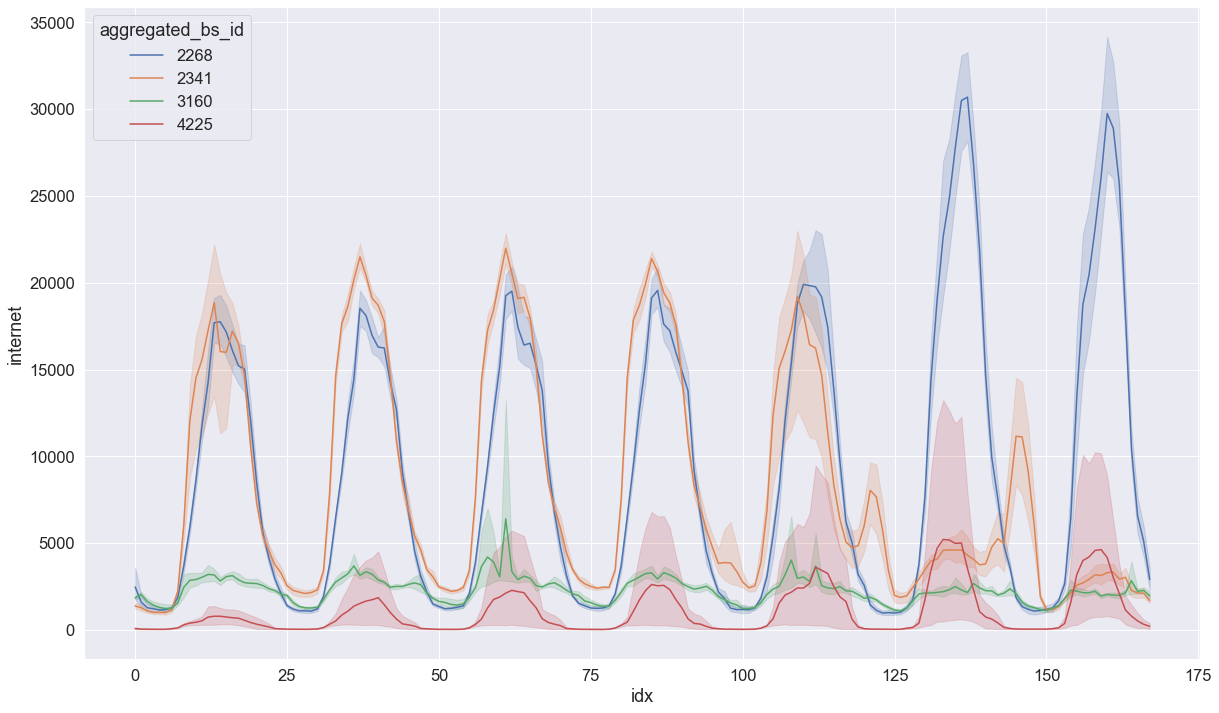

In [132]:
fig = plt.figure(figsize=(20, 12))
sns.lineplot(data=filtered, x='idx', y='internet', hue='aggregated_bs_id')